# 4.2 - Sistemas de recomendación


#### Filtro Colaborativo

Técnica utilizada por algunos sistemas recomendadores, los cuales  suelen incluir conjuntos de datos muy grandes. Hay dos tipos de filtros colaborativos:

+ Basados en Usuarios (User-based):

Se basan en una premisa simple de similitud entre gustos, es decir, en que si una persona A tiene la misma opinión que una persona B sobre un tema, A es más probable que tenga la misma opinión que B en otro tema diferente que la opinión que tendría una persona elegida azar. 

Tiene ciertos inconvenientes. 
Requiere evaluaciones previas, sin algunas evaluaciones de usuarios, no se tienen pistas sobre las evaluaciones de los nuevos usuarios.
No es una matriz densa, usualmente los usuarios dan su rating sobre algunos items y no sobre toda la base de datos, lo que puede dificultar algunos casos por falta de datos pero puede ayudar ya que no se tiene que hacer los cálculos para todas las combinaciones posibles.
Altos costos si los perfiles de usuarios cambian, si los gustos cambian o hay ruido en los datos (ejemplo, 2 personas usan la misma cuenta en el sistema) todo el modelo del sistema debe ser recalculado.

+ Basados en Items (Items-based):

Buscan la similitud entre elementos, utilizan distribuciones de calificación por artículo, no por usuario, lo que puede ayudar a sobrellevar algunos de los problemas de los modelos User-based. Con más usuarios que elementos, cada elemento tiende a tener más calificaciones que cada usuario, por lo que la calificación promedio de un elemento generalmente no cambia rápidamente. Esto conduce a distribuciones de calificación más estables en el modelo, por lo que no es necesario reconstruir el modelo con tanta frecuencia. Cuando los usuarios consumen y luego califican un artículo, los elementos similares de ese elemento se seleccionan del modelo de sistema existente y se agregan a las recomendaciones del usuario.

### Ejemplo Peliculas (User-based)

In [2]:
import pandas as pd
import pylab as plt


%matplotlib inline

In [3]:
from scipy.spatial.distance import pdist         # calcular distancias entre puntos
from scipy.spatial.distance import squareform    # convierte a una matriz cuadrada

In [7]:
ratings=pd.read_csv('../data/movie_ratings.csv').set_index('Movie')  # indice pelis, columnas usuarios
ratings

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Aquaman,4,1,2,2,2
Avengers: Infinity War,2,5,2,5,5
Black Panther,5,2,5,1,1
Bohemian Rhapsody,2,3,4,4,1
Deadpool 2,3,2,4,5,1
Fantastic Beasts: The Crimes of Grindelwald,5,4,1,2,5
Incredibles 2,4,2,3,4,4
Jurassic World: Fallen Kingdom,2,3,5,4,5
Mission: Impossible – Fallout,5,5,4,3,2


In [8]:
def plot(m1, m2):
    
    x=ratings.T[m1]  # ratings de las peliculas
    y=ratings.T[m2]
    
    n=list(ratings.T.index)  # nombres de los usuarios
    
    plt.figure(figsize=(10, 5))
    
    plt.scatter(x, y, s=0) # scatter vacio...para luego poner los nombres
    
    plt.title('Espacio para {} VS. {}'.format(m1, m2), fontsize=14)
    plt.xlabel(m1, fontsize=14)
    plt.ylabel(m2, fontsize=14)
    
    for i,e in enumerate(n):
        plt.annotate(e, (x[i], y[i]), fontsize=12)  # se escribe el nombre en las posiciones correspondientes
    plt.show();

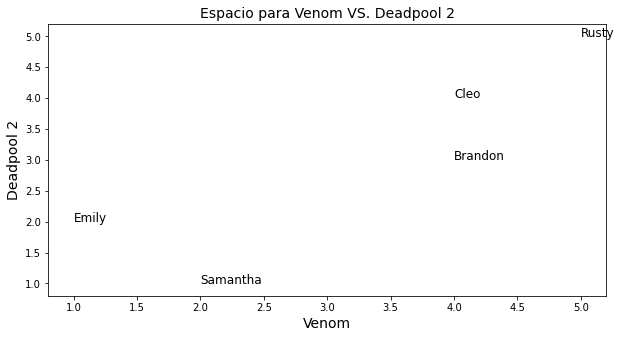

In [9]:
plot('Venom', 'Deadpool 2')

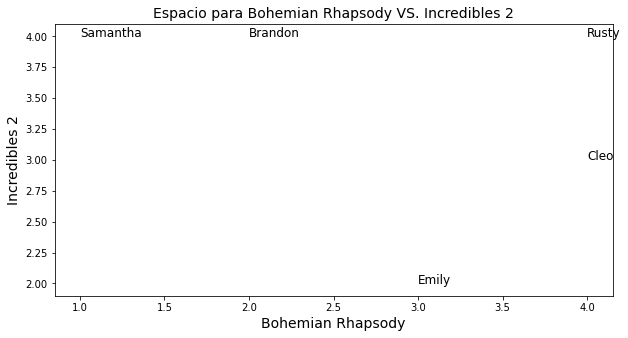

In [10]:
plot('Bohemian Rhapsody', 'Incredibles 2')

In [11]:
distancias=squareform(pdist(ratings.T, 'euclidean'))   # distancias entre usuarios

distancias  # pertenecen al intervalo [0, +inf)

array([[0.        , 6.63324958, 6.        , 7.41619849, 7.48331477],
       [6.63324958, 0.        , 6.92820323, 6.40312424, 5.09901951],
       [6.        , 6.92820323, 0.        , 5.56776436, 8.24621125],
       [7.41619849, 6.40312424, 5.56776436, 0.        , 6.70820393],
       [7.48331477, 5.09901951, 8.24621125, 6.70820393, 0.        ]])

In [13]:
similitud=1/(1+distancias)

similitud=pd.DataFrame(similitud, index=ratings.columns, columns=ratings.columns)

similitud   # pertenece al intervalo [0, 1]

,Brandon,Emily,Cleo,Rusty,Samantha
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878
Emily,0.131006,1.000000,0.126132,0.135078,0.163961
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000


##### metricas de distancia

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.distance.squareform.html

https://docs.scipy.org/doc/scipy-0.14.0/reference/spatial.distance.html

**euclidea**

$$d=\sqrt{x^2 + y^2}$$

$$d=\sqrt{x_1^2 + x_2^2 + \ldots + x_n^2}$$

**cityblock - manhattan**

$$d=x + y$$

**similitud del coseno**

In [14]:
import scipy.spatial.distance as distance
import numpy as np
import math

**producto escalar**

$$(1, 2, 3)·(2, 1, 1)= 1·2 + 2·1 + 3·1 =7$$

In [15]:
def dot(v1, v2):
    return sum(map(lambda x: x[0]*x[1], zip(v1,v2)))

$$\cos{\theta}=\frac{v_{1}·v_{2}}{|v_{1}|·|v_{2}|}$$

donde:

$|V_{1}|=\sqrt{x_1^2+x_2^2+x_3^2}$

In [16]:
def similitud_coseno(v1, v2):
    
    prod=dot(v1, v2)
    
    len1=math.sqrt(dot(v1, v1))
    len2=math.sqrt(dot(v2, v2))
    
    return prod/(len1*len2)

In [17]:
def plot_v(v):
    origen=(0,0)

    plt.quiver(*origen, v[0,0], v[0,1], color=['r'], scale=60)
    plt.quiver(*origen, v[1,0], v[1,1], color=['b'], scale=60)
    
    a=v[0]
    b=v[1]
    
    sim_cos=similitud_coseno(a, b)
    sim_euc=distance.euclidean(a, b)
    
    tit='Coseno: {}, Euclidea: {}'.format(sim_cos.round(2), sim_euc.round(2))
    plt.title(tit)
    plt.grid()
    plt.legend(['A', 'B']);

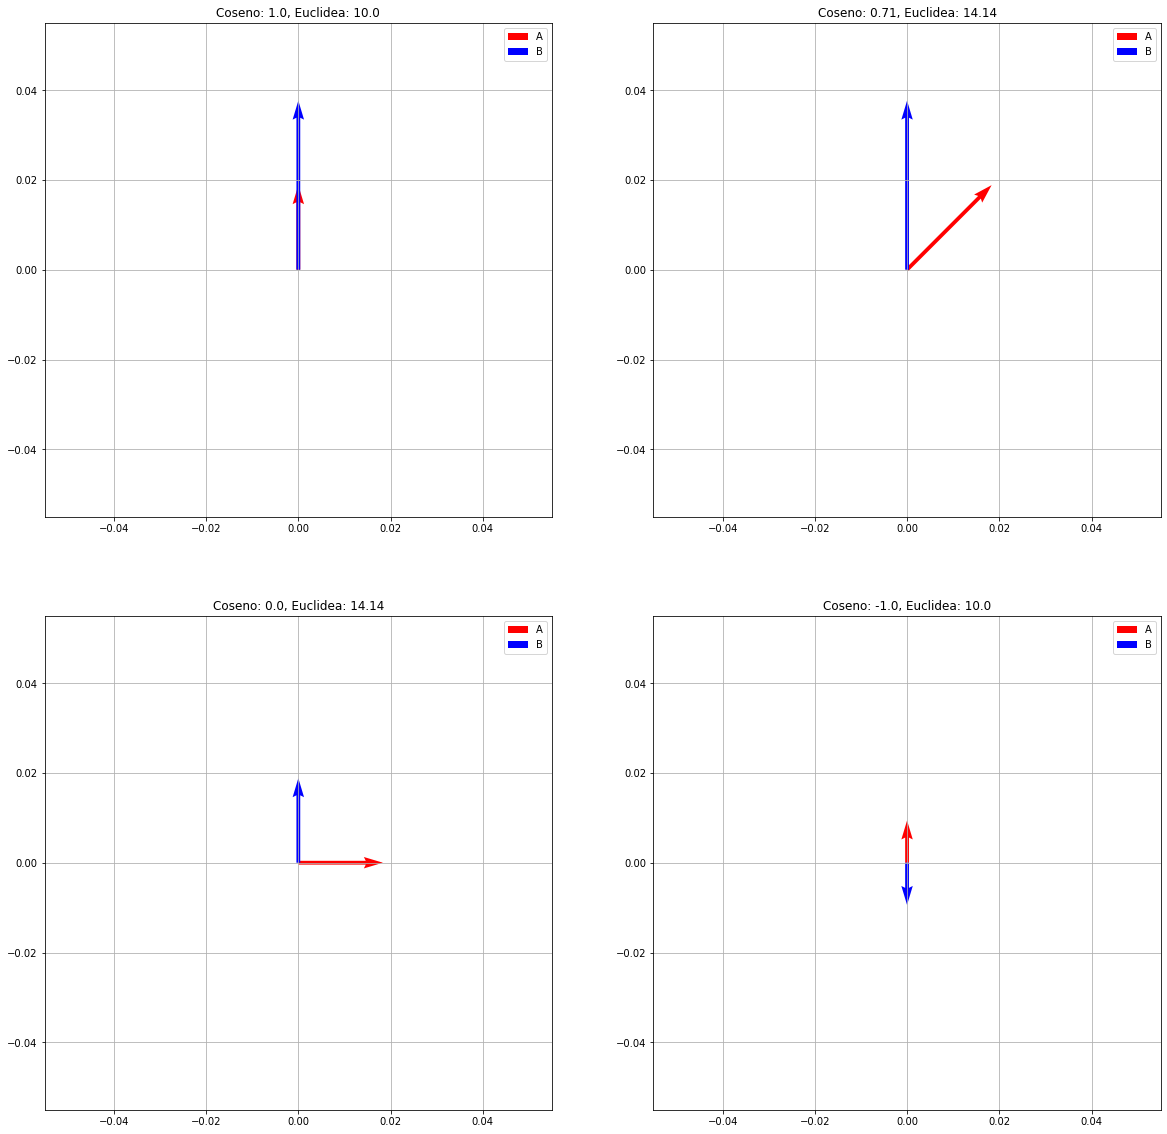

In [18]:
plt.figure(figsize=(20,20))

# caso 1
v=np.array([[0,10], [0, 20]])
plt.subplot(2,2,1)
plot_v(v)

# caso 2
v=np.array([[10,10], [0, 20]])
plt.subplot(2,2,2)
plot_v(v)

# caso 3
v=np.array([[10,0], [0, 10]])
plt.subplot(2,2,3)
plot_v(v)

# caso 4
v=np.array([[0,5], [0, -5]])
plt.subplot(2,2,4)
plot_v(v)

### Generar recomendaciones

In [19]:
tom={'Aquaman': 2, 
     'Avengers: Infinity War':1, 
     'Black Panther':5,
     'Bohemian Rhapsody':5, 
     'Deadpool 2':2,
     'Fantastic Beasts: The Crimes of Grindelwald':3, 
     'Incredibles 2':3,
     'Jurassic World: Fallen Kingdom':4, 
     'Mission: Impossible – Fallout':3,
     'Venom':3}

In [21]:
ratings['Tom']=pd.Series(tom)

display(ratings)

distancias=squareform(pdist(ratings.T, 'euclidean'))

similitud=1/(1+distancias)

similitud=pd.DataFrame(similitud, index=ratings.columns, columns=ratings.columns)

similitud

,Brandon,Emily,Cleo,Rusty,Samantha,Tom
Movie,,,,,,
Aquaman,4,1,2,2,2,2
Avengers: Infinity War,2,5,2,5,5,1
Black Panther,5,2,5,1,1,5
Bohemian Rhapsody,2,3,4,4,1,5
Deadpool 2,3,2,4,5,1,2
Fantastic Beasts: The Crimes of Grindelwald,5,4,1,2,5,3
Incredibles 2,4,2,3,4,4,3
Jurassic World: Fallen Kingdom,2,3,5,4,5,4
Mission: Impossible – Fallout,5,5,4,3,2,3


,Brandon,Emily,Cleo,Rusty,Samantha,Tom
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878,0.156613
Emily,0.131006,1.000000,0.126132,0.135078,0.163961,0.135078
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152,0.217129
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732,0.126132
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000,0.116961
Tom,0.156613,0.135078,0.217129,0.126132,0.116961,1.000000


In [22]:
n_ratings=pd.read_csv('../data/movie_ratings2.csv')

n_ratings

,Movie,Brandon,Emily,Cleo,Rusty,Samantha
0,Beauty and the Beast,2,5,2,5,2
1,Despicable Me 3,4,5,5,1,2
2,Guardians of the Galaxy Vol. 2,4,1,5,4,2
3,Jumanji: Welcome to the Jungle,4,3,3,2,5
4,Spider-Man: Homecoming,1,3,5,2,5
5,Star Wars: The Last Jedi,5,4,1,2,2
6,The Fate of the Furious,2,1,3,3,3
7,Thor: Ragnarok,4,3,4,1,5
8,Wolf Warrior 2,5,3,2,3,4
9,Wonder Woman,4,3,4,3,4


#### Score de similitud

In [25]:
simil_score=similitud['Tom'].sort_values(ascending=False)[1:]

recom=n_ratings.copy()


for n, s in dict(simil_score).items():
    recom[n]=recom[n]*s
    

recom['Total']=recom.sum(axis=1)

recom.sort_values('Total', ascending=False)

,Movie,Brandon,Emily,Cleo,Rusty,Samantha,Total
1,Despicable Me 3,0.626452,0.675391,1.085646,0.126132,0.233923,2.747544
9,Wonder Woman,0.626452,0.405234,0.868517,0.378396,0.467845,2.746445
7,Thor: Ragnarok,0.626452,0.405234,0.868517,0.126132,0.584807,2.611142
2,Guardians of the Galaxy Vol. 2,0.626452,0.135078,1.085646,0.504528,0.233923,2.585627
3,Jumanji: Welcome to the Jungle,0.626452,0.405234,0.651388,0.252264,0.584807,2.520145
4,Spider-Man: Homecoming,0.156613,0.405234,1.085646,0.252264,0.584807,2.484564
8,Wolf Warrior 2,0.783065,0.405234,0.434259,0.378396,0.467845,2.468799
0,Beauty and the Beast,0.313226,0.675391,0.434259,0.630660,0.233923,2.287458
5,Star Wars: The Last Jedi,0.783065,0.540312,0.217129,0.252264,0.233923,2.026693
6,The Fate of the Furious,0.313226,0.135078,0.651388,0.378396,0.350884,1.828972


In [27]:
# con otras metricas

distancias=squareform(pdist(ratings.T, 'cosine'))

similitud=1/(1+distancias)

similitud=pd.DataFrame(similitud, index=ratings.columns, columns=ratings.columns)

simil_score=similitud['Tom'].sort_values(ascending=False)[1:]

recom=n_ratings.copy()


for nombre, similitud in dict(simil_score).items():
    recom[nombre]=recom[nombre]*similitud
    

recom['Total']=recom.sum(axis=1)

recom.sort_values('Total', ascending=False)

,Movie,Brandon,Emily,Cleo,Rusty,Samantha,Total
9,Wonder Woman,3.615951,2.511274,3.809728,2.532334,3.168375,15.637662
1,Despicable Me 3,3.615951,4.185457,4.762161,0.844111,1.584187,14.991867
7,Thor: Ragnarok,3.615951,2.511274,3.809728,0.844111,3.960468,14.741533
8,Wolf Warrior 2,4.519939,2.511274,1.904864,2.532334,3.168375,14.636786
3,Jumanji: Welcome to the Jungle,3.615951,2.511274,2.857296,1.688222,3.960468,14.633212
2,Guardians of the Galaxy Vol. 2,3.615951,0.837091,4.762161,3.376445,1.584187,14.175835
4,Spider-Man: Homecoming,0.903988,2.511274,4.762161,1.688222,3.960468,13.826113
0,Beauty and the Beast,1.807976,4.185457,1.904864,4.220556,1.584187,13.703040
5,Star Wars: The Last Jedi,4.519939,3.348365,0.952432,1.688222,1.584187,12.093146
6,The Fate of the Furious,1.807976,0.837091,2.857296,2.532334,2.376281,10.410978


In [28]:
distancias=squareform(pdist(ratings.T, 'cityblock'))

similitud=1/(1+distancias)

similitud=pd.DataFrame(similitud, index=ratings.columns, columns=ratings.columns)

simil_score=similitud['Tom'].sort_values(ascending=False)[1:]

recom=n_ratings.copy()


for nombre, similitud in dict(simil_score).items():
    recom[nombre]=recom[nombre]*similitud
    

recom['Total']=recom.sum(axis=1)

recom.sort_values('Total', ascending=False)

,Movie,Brandon,Emily,Cleo,Rusty,Samantha,Total
9,Wonder Woman,0.2500,0.166667,0.4,0.176471,0.20,1.193137
1,Despicable Me 3,0.2500,0.277778,0.5,0.058824,0.10,1.186601
2,Guardians of the Galaxy Vol. 2,0.2500,0.055556,0.5,0.235294,0.10,1.140850
7,Thor: Ragnarok,0.2500,0.166667,0.4,0.058824,0.25,1.125490
4,Spider-Man: Homecoming,0.0625,0.166667,0.5,0.117647,0.25,1.096814
3,Jumanji: Welcome to the Jungle,0.2500,0.166667,0.3,0.117647,0.25,1.084314
8,Wolf Warrior 2,0.3125,0.166667,0.2,0.176471,0.20,1.055637
0,Beauty and the Beast,0.1250,0.277778,0.2,0.294118,0.10,0.996895
5,Star Wars: The Last Jedi,0.3125,0.222222,0.1,0.117647,0.10,0.852369
6,The Fate of the Furious,0.1250,0.055556,0.3,0.176471,0.15,0.807026


In [29]:
distancias=squareform(pdist(ratings.T, 'jaccard'))

similitud=1/(1+distancias)

similitud=pd.DataFrame(similitud, index=ratings.columns, columns=ratings.columns)

simil_score=similitud['Tom'].sort_values(ascending=False)[1:]

recom=n_ratings.copy()


for nombre, similitud in dict(simil_score).items():
    recom[nombre]=recom[nombre]*similitud
    

recom['Total']=recom.sum(axis=1)

recom.sort_values('Total', ascending=False)

,Movie,Brandon,Emily,Cleo,Rusty,Samantha,Total
9,Wonder Woman,2.105263,1.578947,2.352941,1.764706,2.105263,9.907121
1,Despicable Me 3,2.105263,2.631579,2.941176,0.588235,1.052632,9.318885
3,Jumanji: Welcome to the Jungle,2.105263,1.578947,1.764706,1.176471,2.631579,9.256966
7,Thor: Ragnarok,2.105263,1.578947,2.352941,0.588235,2.631579,9.256966
8,Wolf Warrior 2,2.631579,1.578947,1.176471,1.764706,2.105263,9.256966
2,Guardians of the Galaxy Vol. 2,2.105263,0.526316,2.941176,2.352941,1.052632,8.978328
0,Beauty and the Beast,1.052632,2.631579,1.176471,2.941176,1.052632,8.854489
4,Spider-Man: Homecoming,0.526316,1.578947,2.941176,1.176471,2.631579,8.854489
5,Star Wars: The Last Jedi,2.631579,2.105263,0.588235,1.176471,1.052632,7.554180
6,The Fate of the Furious,1.052632,0.526316,1.764706,1.764706,1.578947,6.687307


In [30]:
# por productos

distancias=squareform(pdist(ratings, 'euclidean'))

similitud=1/(1+distancias)

similitud=pd.DataFrame(similitud, index=ratings.index, columns=ratings.index)

similitud

Movie,Aquaman,Avengers: Infinity War,Black Panther,Bohemian Rhapsody,Deadpool 2,Fantastic Beasts: The Crimes of Grindelwald,Incredibles 2,Jurassic World: Fallen Kingdom,Mission: Impossible – Fallout,Venom
Movie,,,,,,,,,,
Aquaman,1.000000,0.138026,0.175734,0.163961,0.200000,0.179129,0.231662,0.146392,0.172538,0.210897
Avengers: Infinity War,0.138026,1.000000,0.103517,0.135078,0.152259,0.169521,0.182744,0.172538,0.154387,0.141188
Black Panther,0.175734,0.103517,1.000000,0.182744,0.154387,0.135078,0.161390,0.142857,0.186605,0.169521
Bohemian Rhapsody,0.163961,0.135078,0.182744,1.000000,0.224009,0.132320,0.186605,0.190744,0.186605,0.210897
Deadpool 2,0.200000,0.152259,0.154387,0.224009,1.000000,0.132320,0.217129,0.169521,0.186605,0.333333
Fantastic Beasts: The Crimes of Grindelwald,0.179129,0.169521,0.135078,0.132320,0.132320,1.000000,0.210897,0.152259,0.182744,0.141188
Incredibles 2,0.231662,0.182744,0.161390,0.186605,0.217129,0.210897,1.000000,0.231662,0.200000,0.274292
Jurassic World: Fallen Kingdom,0.146392,0.172538,0.142857,0.190744,0.169521,0.152259,0.231662,1.000000,0.166667,0.182744
Mission: Impossible – Fallout,0.172538,0.154387,0.186605,0.186605,0.186605,0.182744,0.200000,0.166667,1.000000,0.179129
